In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

data = pd.read_csv('twitter_training.csv',header=None)

data.head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Sam\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [19]:
column_titles = ['ID','Game','Sentiment','Text']
data.columns = column_titles

In [20]:
data.head()

,ID,Game,Sentiment,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [21]:
sid = SentimentIntensityAnalyzer()

In [22]:
data['Text'] = data['Text'].astype(str)

In [23]:
def get_sentiment_score(text):
    return sid.polarity_scores(text)['compound']

data['sentiment_score'] = data['Text'].apply(get_sentiment_score)
data['Sentiment'] = data['sentiment_score'].apply(lambda score: 'positive' if score > 0.05 else ('negative' if score < -0.05 else 'neautral'))

In [24]:
print(data.head())

     ID         Game Sentiment  \
0  2401  Borderlands  negative   
1  2401  Borderlands  negative   
2  2401  Borderlands  negative   
3  2401  Borderlands  negative   
4  2401  Borderlands  negative   

                                                Text  sentiment_score  
0  im getting on borderlands and i will murder yo...          -0.6908  
1  I am coming to the borders and I will kill you...          -0.6908  
2  im getting on borderlands and i will kill you ...          -0.6908  
3  im coming on borderlands and i will murder you...          -0.6908  
4  im getting on borderlands 2 and i will murder ...          -0.6908  


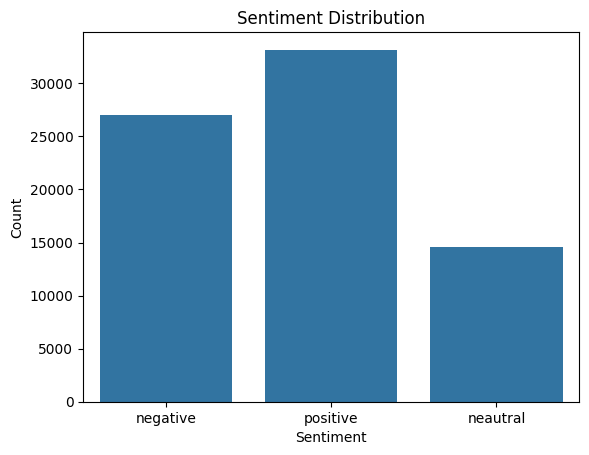

In [27]:
sns.countplot(x='Sentiment',data=data)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()